In [1]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-23T14:46:02.000,45459574,HEAT/HOT WATER,11208.0,54 ELDERT LANE,ELDERT LANE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.689998,-73.867822,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-23T05:05:12.000,45459581,HEAT/HOT WATER,10463.0,3805 REVIEW PLACE,REVIEW PLACE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.884961,-73.899639,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-23T15:51:43.000,45460622,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.877404,-73.880713,NaN,RESIDENTIAL BUILDING,Open
3,2020-01-23T18:28:57.000,45459699,PAINT/PLASTER,10033.0,427 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.849395,-73.938903,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-23T18:42:16.000,45460666,HEAT/HOT WATER,10459.0,1304 REV JAMES POLITE AVENUE,REV JAMES POLITE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830102,-73.895252,NaN,RESIDENTIAL BUILDING,Open


In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
df_data_main['complaint_type'] = np.where(df_data_main['complaint_type']=='HEATING','HEAT/HOT WATER', df_data_main['complaint_type'])
df_data_main['complaint_type'].value_counts()

HEAT/HOT WATER            2143188
PLUMBING                   710635
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       450898
PAINT - PLASTER            361257
PAINT/PLASTER              346192
ELECTRIC                   307098
NONCONST                   260890
DOOR/WINDOW                204964
WATER LEAK                 193333
GENERAL                    151087
FLOORING/STAIRS            137291
APPLIANCE                  112659
HPD Literature Request      52830
SAFETY                      51445
OUTSIDE BUILDING             7129
ELEVATOR                     6715
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: complain

In [6]:
df_data_main = df_data_main[(df_data_main['complaint_type'] == 'HEAT/HOT WATER') & ((df_data_main['borough'] == 'BROOKLYN')|(df_data_main['borough'] == 'BRONX'))]
print(df_data_main['incident_address'].isnull().sum())
df_data_main.dropna(subset=['incident_address'],inplace=True)
print(df_data_main['incident_address'].isnull().sum())

1
0


We have identified list of important features which we have analyzed in last notebook-que.3

In [7]:
df_data_BK = df_data_BK[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                         'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                         'ZipCode', 'YCoord', 'XCoord']]
df_data_BX = df_data_BX[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                         'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                         'ZipCode', 'YCoord', 'XCoord']]

In [8]:
print(df_data_BX['Address'].isnull().sum())
df_data_BX.dropna(subset=['Address'],inplace=True)
print(df_data_BX['Address'].isnull().sum())
print(len(df_data_BX['Address']))
print(df_data_BK['Address'].isnull().sum())
df_data_BK.dropna(subset=['Address'],inplace=True)
print(df_data_BK['Address'].isnull().sum())
print(len(df_data_BK['Address']))

69
0
89785
183
0
277133


In [9]:
#Lets calculate total number of complaints from a particular address in 311 dataset
df_data_main_group = df_data_main.groupby(['incident_address']).count()
df_data_main_group.rename(columns={"complaint_type": "complaint_count"}, inplace=True)
df_data_main_group = df_data_main_group[['complaint_count']]
df_data_main_group.head()

,complaint_count
incident_address,
1 12 STREET,1
1 43 STREET,1
1 74 STREET,31
1 ADRIAN AVENUE,39
1 ALBEMARLE ROAD,2


In [10]:
print(df_data_BX['Address'].value_counts())

SHORE DRIVE               42
PALISADE AVENUE           37
WHITE PLAINS ROAD         35
PARK AVENUE               35
BRUCKNER BOULEVARD        34
MAJ WM DEEGAN BLVD        32
WEST 246 STREET           29
SEDGWICK AVENUE           27
POST ROAD                 22
3 AVENUE                  21
UNIVERSITY AVENUE         21
WESTCHESTER AVENUE        20
WEBSTER AVENUE            20
BRONX RIVER AVENUE        20
JEROME AVENUE             19
RANDALL AVENUE            19
FIELDSTON ROAD            19
BOSTON ROAD               19
PAULDING AVENUE           18
CITY ISLAND AVENUE        18
BAYCHESTER AVENUE         18
CROSS BRONX EXPWY         18
INDEPENDENCE AVENUE       17
EAST TREMONT AVENUE       16
VAN NEST AVENUE           16
KING AVENUE               16
CORNELL AVENUE            16
HEATH AVENUE              15
LURTING AVENUE            15
LAFAYETTE AVENUE          15
                          ..
1422 BOSTON ROAD           1
409 EAST GUN HILL ROAD     1
38 MARCY PLACE             1
1465 NEEDHAM A

In [11]:
df_data_BX.drop_duplicates(subset=['Address'], inplace=True)
df_data_BK.drop_duplicates(subset=['Address'], inplace=True)

In [12]:
print(len(df_data_BX['Address']) == len(df_data_BX['Address'].unique())) 
print(len(df_data_BK['Address']) == len(df_data_BK['Address'].unique())) 

True
True


In [13]:
df_BKBX = pd.concat([df_data_BX,df_data_BK], ignore_index=False, axis=0, sort = True)
df_BKBX.isnull().sum()

Address          0
BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
Lot              0
LotArea          0
LotDepth         0
NumBldgs         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
XCoord        2559
YCoord        2559
YearAlter1       0
YearBuilt        0
ZipCode        194
dtype: int64

In [14]:
print(len(df_BKBX) == (len(df_data_BX) + len(df_data_BK)))

True


In [15]:
df_BKBX_analyze = pd.merge(left=df_data_main_group,right=df_BKBX, left_on='incident_address', right_on='Address',how='right')
df_BKBX_analyze['Age'] = 2020 - df_BKBX_analyze['YearBuilt']
# df_BKBX['YCoord'] = df_analyse_BX.YCoord.fillna(0.0).astype(float)
# df_BKBX['XCoord'] = df_analyse_BX.XCoord.fillna(0.0).astype(float)
# df_BKBX['ZipCode'] = df_analyse_BX.ZipCode.fillna(0).astype(int)
# df_analyse_BX['complaint_count'] = df_analyse_BX.complaint_count.fillna(0).astype(int)
# df_analyse_BX['Age'] = df_analyse_BX.Age.fillna(0).astype(int)

In [16]:
df_BKBX_analyze.isnull().sum()

complaint_count    305086
Address                 0
BldgArea                0
BldgDepth               0
BuiltFAR                0
CommFAR                 0
FacilFAR                0
Lot                     0
LotArea                 0
LotDepth                0
NumBldgs                0
NumFloors               0
OfficeArea              0
ResArea                 0
ResidFAR                0
RetailArea              0
XCoord               2559
YCoord               2559
YearAlter1              0
YearBuilt               0
ZipCode               194
Age                     0
dtype: int64

In [17]:
df_BKBX_analyze[pd.isna(df_BKBX_analyze['complaint_count']) == True].head()

,complaint_count,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,Age
54069,NaN,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0,0,6.02,0,1005957.0,232162.0,0,0,10454.0,2020
54070,NaN,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,272,0,6.02,0,1006076.0,232156.0,1994,1931,10454.0,89
54071,NaN,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,0,0,6.02,0,1006187.0,232036.0,0,1931,10454.0,89
54072,NaN,ST ANNS AVENUE,0,0.0,0.00,5.0,6.5,19,15625,100.0,...,0,0,6.02,0,1006303.0,231950.0,0,0,10454.0,2020
54073,NaN,519 EAST 132 STREET,5316,100.0,0.61,5.0,6.5,34,8700,100.0,...,0,0,6.02,0,1006046.0,232055.0,0,1931,10454.0,89


In [18]:
df_BKBX_analyze['HEAT/HOT WATER'] = np.where(pd.isna(df_BKBX_analyze['complaint_count']) == True ,False,True)

In [19]:
len(df_BKBX_analyze[df_BKBX_analyze['HEAT/HOT WATER'] == False])

305086

In [20]:
df_BKBX_analyze.head()

,complaint_count,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,Age,HEAT/HOT WATER
0,31.0,1 74 STREET,112140,294.00,3.36,0.0,3.0,1,33400,294.00,...,112140,3.00,0,974216.0,170478.0,0,1938,11209.0,82,True
1,2.0,1 ALBEMARLE ROAD,67200,182.00,0.99,0.0,2.0,32,68000,340.00,...,0,1.25,0,989656.0,174490.0,2008,1930,11218.0,90,True
2,1.0,1 BAY RIDGE PARKWAY,5193,44.00,2.10,0.0,2.0,50,2474,60.33,...,3394,0.90,0,974089.0,170174.0,0,1970,11209.0,50,True
3,1.0,1 CAMPUS PLACE,1588,36.00,0.85,0.0,2.0,38,1858,75.08,...,1588,1.25,0,1019672.0,188669.0,0,1920,11208.0,100,True
4,1.0,1 CARLTON AVENUE,71071,163.42,1.89,2.0,4.8,16,37564,163.42,...,0,0.00,0,991656.0,193395.0,1995,1957,11205.0,63,True


In [21]:
df_BKBX_analyze['YCoord'] = df_BKBX_analyze.YCoord.fillna(0.0).astype(float)
df_BKBX_analyze['XCoord'] = df_BKBX_analyze.XCoord.fillna(0.0).astype(float)
df_BKBX_analyze['ZipCode'] = df_BKBX_analyze.ZipCode.fillna(0).astype(int)
df_BKBX_analyze['complaint_count'] = df_BKBX_analyze.complaint_count.fillna(0).astype(int)

In [22]:
df_BKBX_analyze.isnull().sum()

complaint_count    0
Address            0
BldgArea           0
BldgDepth          0
BuiltFAR           0
CommFAR            0
FacilFAR           0
Lot                0
LotArea            0
LotDepth           0
NumBldgs           0
NumFloors          0
OfficeArea         0
ResArea            0
ResidFAR           0
RetailArea         0
XCoord             0
YCoord             0
YearAlter1         0
YearBuilt          0
ZipCode            0
Age                0
HEAT/HOT WATER     0
dtype: int64

In [23]:
df_BKBX_analyze

,complaint_count,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,Age,HEAT/HOT WATER
0,31,1 74 STREET,112140,294.00,3.36,0.0,3.0,1,33400,294.00,...,112140,3.00,0,974216.0,170478.0,0,1938,11209,82,True
1,2,1 ALBEMARLE ROAD,67200,182.00,0.99,0.0,2.0,32,68000,340.00,...,0,1.25,0,989656.0,174490.0,2008,1930,11218,90,True
2,1,1 BAY RIDGE PARKWAY,5193,44.00,2.10,0.0,2.0,50,2474,60.33,...,3394,0.90,0,974089.0,170174.0,0,1970,11209,50,True
3,1,1 CAMPUS PLACE,1588,36.00,0.85,0.0,2.0,38,1858,75.08,...,1588,1.25,0,1019672.0,188669.0,0,1920,11208,100,True
4,1,1 CARLTON AVENUE,71071,163.42,1.89,2.0,4.8,16,37564,163.42,...,0,0.00,0,991656.0,193395.0,1995,1957,11205,63,True
5,18,1 CAROLL STREET,6814,21.00,0.51,0.0,1.0,164,13320,111.00,...,6814,0.60,0,1042382.0,247256.0,1994,1930,10464,90,True
6,1,1 DOROTHEA PLACE,2395,31.00,0.35,0.0,2.0,85,6813,125.00,...,2395,0.90,0,1014235.0,253669.0,0,1920,10458,100,True
7,42,1 EAST 198 STREET,58962,101.00,4.37,0.0,6.5,29,13500,111.00,...,56462,6.02,2500,1013989.0,256755.0,0,1941,10468,79,True
8,131,1 ELTON STREET,22946,77.00,3.06,0.0,2.0,8,7491,77.17,...,22946,0.90,0,1016046.0,188367.0,0,1905,11208,115,True
9,2,1 FAIRVIEW PLACE,1408,43.00,0.77,0.0,4.8,40,1817,100.00,...,1408,2.43,0,998575.0,176693.0,0,1910,11226,110,True


Let's divide the problem into two subproblems<br>
1.Build a predictive model to predict the future complaint will be either HEAT/HOT WATER or not by using past data.<br>
2.Predict the number of future complaints for HEAT/HOT WATER for new entries

# 1.Build a predictive model to predict the future complaint will be either HEAT/HOT WATER or not by using past data

In [24]:
imp_features=['NumFloors','ResArea','BuiltFAR','Age','BldgDepth']

In [25]:
df_BKBX_analyze[imp_features].head()

,NumFloors,ResArea,BuiltFAR,Age,BldgDepth
0,6.0,112140,3.36,82,294.00
1,4.0,0,0.99,90,182.00
2,2.0,3394,2.10,50,44.00
3,2.0,1588,0.85,100,36.00
4,6.0,0,1.89,63,163.42


In [26]:
x_data = df_BKBX_analyze[imp_features]
y_data = df_BKBX_analyze['HEAT/HOT WATER']

### As this is a Classification problem We will use Random forest classifier to make the prediction

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
!pip install xgboost
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=42)

In [29]:
steps = [('scaler', StandardScaler()),('rf_model', RandomForestClassifier(n_estimators=100,random_state=0))]
pipe = Pipeline(steps)

In [30]:
rf= pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_pred[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([False, False, False, False, False])

In [31]:
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print('Report : ')
print(classification_report(y_test, y_pred)) 

Confusion Matrix :
[[87375  4098]
 [10734  5540]]
Accuracy Score : 0.8623441951980102
Report : 
              precision    recall  f1-score   support

       False       0.89      0.96      0.92     91473
        True       0.57      0.34      0.43     16274

   micro avg       0.86      0.86      0.86    107747
   macro avg       0.73      0.65      0.67    107747
weighted avg       0.84      0.86      0.85    107747



### Let's also make use of XGBoost classifier to make the prediction

In [32]:
xg_steps = [('scaler', StandardScaler()),('xgb_model', XGBClassifier())]
pipe = Pipeline(steps)

In [33]:
xgb= pipe.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [34]:
y_pred_xgb = pipe.predict(x_test)
y_pred_xgb[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([False, False, False, False, False])

In [35]:
results_xgb = confusion_matrix(y_test, y_pred_xgb) 
print('Confusion Matrix :')
print(results_xgb) 
print('Accuracy Score :',accuracy_score(y_test, y_pred_xgb)) 
print('Report : ')
print(classification_report(y_test, y_pred_xgb)) 

Confusion Matrix :
[[87375  4098]
 [10734  5540]]
Accuracy Score : 0.8623441951980102
Report : 
              precision    recall  f1-score   support

       False       0.89      0.96      0.92     91473
        True       0.57      0.34      0.43     16274

   micro avg       0.86      0.86      0.86    107747
   macro avg       0.73      0.65      0.67    107747
weighted avg       0.84      0.86      0.85    107747



# 2.Predict the number of future complaints for HEAT/HOT WATER for new entries

Here we will only use that data for which HEAT/HOT WATER is True

In [36]:
df_num_complaints = df_BKBX_analyze[df_BKBX_analyze['HEAT/HOT WATER'] == True]
df_num_complaints.head()

,complaint_count,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,Age,HEAT/HOT WATER
0,31,1 74 STREET,112140,294.00,3.36,0.0,3.0,1,33400,294.00,...,112140,3.00,0,974216.0,170478.0,0,1938,11209,82,True
1,2,1 ALBEMARLE ROAD,67200,182.00,0.99,0.0,2.0,32,68000,340.00,...,0,1.25,0,989656.0,174490.0,2008,1930,11218,90,True
2,1,1 BAY RIDGE PARKWAY,5193,44.00,2.10,0.0,2.0,50,2474,60.33,...,3394,0.90,0,974089.0,170174.0,0,1970,11209,50,True
3,1,1 CAMPUS PLACE,1588,36.00,0.85,0.0,2.0,38,1858,75.08,...,1588,1.25,0,1019672.0,188669.0,0,1920,11208,100,True
4,1,1 CARLTON AVENUE,71071,163.42,1.89,2.0,4.8,16,37564,163.42,...,0,0.00,0,991656.0,193395.0,1995,1957,11205,63,True


In [37]:
x_data_num = df_num_complaints[imp_features]
y_data_num = df_num_complaints['complaint_count']

In [38]:
print(x_data_num.dtypes)
print(y_data_num.dtypes)

NumFloors    float64
ResArea        int64
BuiltFAR     float64
Age            int64
BldgDepth    float64
dtype: object
int64


As data in both x_data_num and y_data_num is numerical and continuous, we have to use Regression model

In [39]:
x_data_num.head()

,NumFloors,ResArea,BuiltFAR,Age,BldgDepth
0,6.0,112140,3.36,82,294.00
1,4.0,0,0.99,90,182.00
2,2.0,3394,2.10,50,44.00
3,2.0,1588,0.85,100,36.00
4,6.0,0,1.89,63,163.42


In [40]:
# scaler =  StandardScaler().fit(x_traindata)

In [41]:
# xy = scaler.transform(x_traindata)

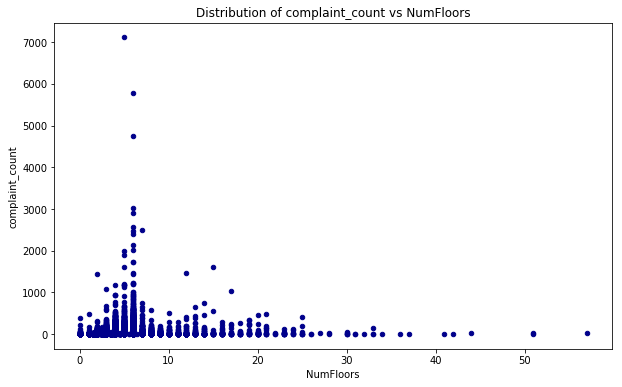

In [42]:
df_num_complaints.plot(kind='scatter', x='NumFloors', y='complaint_count', figsize=(10, 6), color='darkblue')
plt.title('Distribution of complaint_count vs NumFloors')
plt.xlabel('NumFloors')
plt.ylabel('complaint_count')
plt.show()

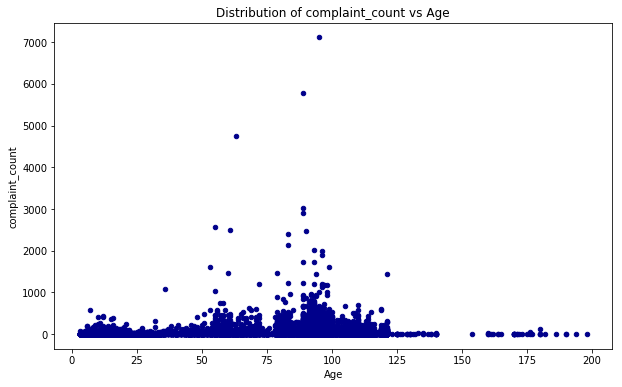

In [43]:
df_num_complaints[df_num_complaints['Age'] < 200].plot(kind='scatter', x='Age', y='complaint_count', figsize=(10, 6), color='darkblue')
plt.title('Distribution of complaint_count vs Age')
plt.xlabel('Age')
plt.ylabel('complaint_count')
plt.show()

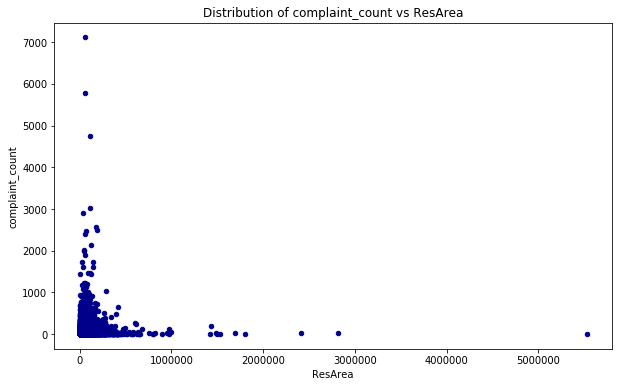

In [44]:
df_num_complaints.plot(kind='scatter', x='ResArea', y='complaint_count', figsize=(10, 6), color='darkblue')
plt.title('Distribution of complaint_count vs ResArea')
plt.xlabel('ResArea')
plt.ylabel('complaint_count')
plt.show()

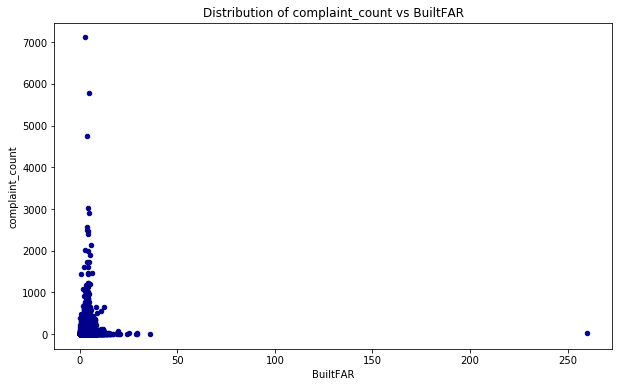

In [45]:
df_num_complaints.plot(kind='scatter', x='BuiltFAR', y='complaint_count', figsize=(10, 6), color='darkblue')
plt.title('Distribution of complaint_count vs BuiltFAR')
plt.xlabel('BuiltFAR')
plt.ylabel('complaint_count')
plt.show()

As any of the above distribution plot doesn't give exact relation between feature and target, our model might not have high accuracy, Let's first remove outlier as they ll reduce the model accuracy  and Let's use Random Forest regressor as it is best suited for this scenerio 

In [46]:
df_last = df_num_complaints[(df_num_complaints['complaint_count'] < 4000) & (df_num_complaints['Age'] < 200) & (df_num_complaints['ResArea'] < 2000000) & (df_num_complaints['BuiltFAR'] < 50)]

In [47]:
len(df_last)

53694

In [48]:
x_data_num = df_last[imp_features]
y_data_num = df_last['complaint_count']
x_traindata, x_testdata, y_traindata, y_testdata = train_test_split(x_data_num,y_data_num , test_size=0.25, random_state=42)

In [49]:
# As there are almost 50000 records we will keep min_sample_split = 20
rfr  = RandomForestRegressor(min_samples_split=20, n_estimators=100)

In [50]:
rfr_model = rfr.fit(x_traindata, y_traindata)

In [51]:
y_pred_rfr = rfr_model.predict(x_testdata).astype('int')

In [52]:
results = confusion_matrix(y_testdata, y_pred_rfr) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_testdata, y_pred_rfr)) 
print('Report : ')
print(classification_report(y_testdata, y_pred_rfr)) 

Confusion Matrix :
[[105 487 935 ...   0   0   0]
 [ 31 202 374 ...   0   0   0]
 [  6 104 224 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Accuracy Score : 0.059967222884386176
Report : 
              precision    recall  f1-score   support

           1       0.65      0.03      0.05      4150
           2       0.19      0.11      0.14      1860
           3       0.10      0.19      0.13      1187
           4       0.06      0.15      0.09       750
           5       0.05      0.12      0.07       602
           6       0.03      0.06      0.04       472
           7       0.02      0.03      0.03       362
           8       0.01      0.02      0.02       298
           9       0.02      0.02      0.02       278
          10       0.02      0.03      0.02       188
          11       0.02      0.02      0.02       206
          12       0.01      0.02      0.02       168
          13       0.01      0.01     

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

we can divide the complaint_counts into 5 groups as we done earlier<br>
Group-0 : 1-4 complaint_count<br>
Group-1 : 4-10 complaint_count<br>
Group-2 : 10-50 complaint_count<br>
Group-3 : 50-100 complaint_count<br>
Group-4 : 100 and above complaint_count<br>

In [53]:
def group_decider(count):
    if count <= 4:
        complaint_group = 'Group-0'
    elif count > 4 and count <= 10:
        complaint_group = 'Group-1'
    elif count > 10 and count <= 50:
        complaint_group = 'Group-2'
    elif count > 50 and count <= 100:
        complaint_group = 'Group-3'
    elif count > 100:
        complaint_group = 'Group-4'
    return complaint_group

In [54]:
df_last['complaint_group'] = df_last['complaint_count'].apply(lambda x : group_decider(x))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
df_last.head()

,complaint_count,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,Age,HEAT/HOT WATER,complaint_group
0,31,1 74 STREET,112140,294.00,3.36,0.0,3.0,1,33400,294.00,...,3.00,0,974216.0,170478.0,0,1938,11209,82,True,Group-2
1,2,1 ALBEMARLE ROAD,67200,182.00,0.99,0.0,2.0,32,68000,340.00,...,1.25,0,989656.0,174490.0,2008,1930,11218,90,True,Group-0
2,1,1 BAY RIDGE PARKWAY,5193,44.00,2.10,0.0,2.0,50,2474,60.33,...,0.90,0,974089.0,170174.0,0,1970,11209,50,True,Group-0
3,1,1 CAMPUS PLACE,1588,36.00,0.85,0.0,2.0,38,1858,75.08,...,1.25,0,1019672.0,188669.0,0,1920,11208,100,True,Group-0
4,1,1 CARLTON AVENUE,71071,163.42,1.89,2.0,4.8,16,37564,163.42,...,0.00,0,991656.0,193395.0,1995,1957,11205,63,True,Group-0


In [56]:
x_data_rfc = df_last[imp_features]
y_data_rfc = df_last['complaint_group']
y_data_rfc

0        Group-2
1        Group-0
2        Group-0
3        Group-0
4        Group-0
5        Group-2
6        Group-0
7        Group-2
8        Group-4
9        Group-0
10       Group-0
11       Group-0
12       Group-0
13       Group-0
14       Group-0
15       Group-0
16       Group-2
17       Group-2
18       Group-0
19       Group-0
20       Group-0
21       Group-2
22       Group-2
23       Group-0
24       Group-4
25       Group-2
26       Group-0
27       Group-2
28       Group-0
29       Group-0
          ...   
54039    Group-2
54040    Group-1
54041    Group-0
54042    Group-0
54043    Group-2
54044    Group-0
54045    Group-0
54046    Group-2
54047    Group-0
54048    Group-2
54049    Group-0
54050    Group-0
54051    Group-0
54052    Group-0
54053    Group-0
54054    Group-0
54055    Group-0
54056    Group-2
54057    Group-0
54058    Group-0
54059    Group-0
54060    Group-2
54061    Group-0
54062    Group-2
54063    Group-2
54064    Group-0
54065    Group-2
54066    Group

In [57]:
x_traindata, x_testdata, y_traindata, y_testdata = train_test_split(x_data_rfc,y_data_rfc , test_size=0.25, random_state=42)

As this is classification problem We will be using Random Forest classifier to predict the complaint_group of complaints.

## Random Forest classifier

In [58]:
# As there are almost 50000 records we will keep min_sample_split = 20
rfc = RandomForestClassifier(min_samples_split=20, n_estimators=100)

In [59]:
rfc_model= rfc.fit(x_traindata, y_traindata)

In [60]:
y_pred_rfc = rfc_model.predict(x_testdata)
print(y_pred_rfc[0:5])
print(y_testdata[0:5])

['Group-0' 'Group-0' 'Group-0' 'Group-0' 'Group-0']
8478     Group-2
1189     Group-0
30238    Group-1
29121    Group-0
1230     Group-2
Name: complaint_group, dtype: object


In [61]:
results = confusion_matrix(y_testdata, y_pred_rfc) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_testdata, y_pred_rfc)) 
print('Report : ')
print(classification_report(y_testdata, y_pred_rfc)) 

Confusion Matrix :
[[7407   56  468    3   13]
 [1778   30  368    8   16]
 [1296   55  872   23   59]
 [ 128    5  299   13   51]
 [  55    4  314   12   91]]
Accuracy Score : 0.6267133492252682
Report : 
              precision    recall  f1-score   support

     Group-0       0.69      0.93      0.80      7947
     Group-1       0.20      0.01      0.03      2200
     Group-2       0.38      0.38      0.38      2305
     Group-3       0.22      0.03      0.05       496
     Group-4       0.40      0.19      0.26       476

   micro avg       0.63      0.63      0.63     13424
   macro avg       0.38      0.31      0.30     13424
weighted avg       0.53      0.63      0.55     13424



# In Concluding Remarks we can say that:<br>
### 1. We have higher accuracy about 87% to determine wheather a house with particular characteristics will have Heat/hot water problem in future or not.<br>
###  2. We can find out number of complaints we may recieve from a house with particular characteristics, but the accuracy is fairly low about 6%, Instead of that we can divide the complaint_count into different groups. Such model will give us higher accuracy which is about 63%.